In [1]:
import pandas as pd
import numpy as np
import os, fnmatch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
def in_sample(data):
    #In sample if between 18 and 34 AND (not in college or not full time)
#     if row['age'] >= 18 and row['age'] < 35 and not (row['age'] < 25 and (row['schlvl'] == 2 and row['studftpt'] == 1)):
#         return 1
#     else:
#         return 0
    return ((data['age'] >= 18) & (data['age'] < 35) & ~((data['age'] < 25) & ((data['schlvl'] == 2) & (data['studftpt'] == 1)))).apply(lambda x: 1 if x else 0)

In [3]:
def independently(data):
    #if row['relref95'] in [1, 2, 3, 10, 12, 13, 14, 15, 16, 17 , 18]:
#     if row['relref95'] in [1, 2, 3, 13, 14, 15, 16, 17 , 18]:
#         return 1
#     else:
#         return 0

#     if 'relref95' in data.columns.tolist():
#         return data['relref95'].isin([1, 2, 3, 13, 14, 15, 16, 17 , 18]).apply(lambda x: 1 if x else 0)
#     elif 'relref94' in data.columns.tolist():
#         return data['relref94'].isin([1, 2, 3, 11]).apply(lambda x: 1 if x else 0)
#     elif 'relaref' in data.columns.tolist():
#         return data['relaref'].isin([1, 2, 3, 4, 9, 10]).apply(lambda x: 1 if x else 0)
#     else:
#         print "No relationship column found"
#         return np.nan
    return (data['relref95'].isin([1, 2, 3, 12, 13, 14, 15, 16, 17 , 18]) |
     data['relref94'].isin([1, 2, 3, 11, 12]) |
     data['relaref'].isin([1, 2, 3, 4, 10])).apply(lambda x: 1 if x else 0)

In [4]:
root = '/Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data'
#Get all of the cost reports
matches = []
for root, dirnames, filenames in os.walk(root):
  for filename in fnmatch.filter(filenames, '*.dta'):
    matches.append(os.path.join(root, filename))

In [15]:
len(matches)

26

In [ ]:
#df = pd.read_stata('CPS Data/2015/cpsmar2015.dta', convert_categoricals = False)

### CBSAs look like they are available for 2005 onwards for all entries; CMSA might be available for all time

In [4]:
columns_to_keep = ['year', 'msafips', 'cbsafips', 'age', 'studftpt', 'schlvl', 'relref95', 'relref94', 'relaref']

In [10]:
def process_CPS_file(path, limit_columns=True):
    print 'Processing {}'.format(path)
    df_in = pd.read_stata(path, convert_categoricals = False) #, columns=columns_to_keep)
    if limit_columns:
        keep = [c for c in df_in.columns.tolist() if c in columns_to_keep]
        df_in = df_in[keep]
    df_in['In Sample'] = in_sample(df_in)
    df_in = df_in[df_in['In Sample'] == 1]
    return df_in

In [6]:
#df = pd.read_pickle('imported_df_1990-2015.pickle')

In [15]:
df = pd.DataFrame()
for item in matches:
    if not df.empty:
        df = df.append(process_CPS_file(item))
    else:
        df = process_CPS_file(item)

Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg00.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg01.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg02.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg03.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg04.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg05.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg06.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg07.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg08.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg09.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg10.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg11.dta
Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg12.dta
Processing /

In [40]:
len(df)

2130010

In [41]:
df.head()

,In Sample,age,cbsafips,msafips,relaref,relref94,relref95,schlvl,studftpt,year
2,1,27,NaN,5160,NaN,NaN,1,NaN,NaN,2000
3,1,21,NaN,5160,NaN,NaN,1,2,2,2000
7,1,33,NaN,5240,NaN,NaN,2,NaN,NaN,2000
13,1,20,NaN,5240,NaN,NaN,4,NaN,NaN,2000
14,1,21,NaN,5240,NaN,NaN,4,NaN,NaN,2000


In [16]:
#df.to_pickle('imported_df_1990-2015.pickle')

In [140]:
#df.to_pickle('imported_df.pickle')

In [7]:
def millenial(data):
    return ((data['age'] >= 18) & (data['age'] < 35) & ~((data['age'] < 25))).apply(lambda x: 1 if x else 0)

In [8]:
def pct_pivot(data, index=['In Sample'], columns=['Living Independently']):
    table = pd.pivot_table(data, values='age', index=index, columns=columns,
               aggfunc=np.count_nonzero,
              margins=True)
    table.drop('All', inplace=True)
    return table.div( table.iloc[:,-1], axis=0 )

In [9]:
[item for item in df.columns.tolist() if 'msa' in item]

['msafips']

In [10]:
df = df[columns_to_keep]

In [11]:
len(df)

2130010

In [12]:
df['Living Independently'] = independently(df)

In [20]:
df.columns

Index([u'year', u'msafips', u'cbsafips', u'age', u'studftpt', u'schlvl',
       u'relref95', u'Living Independently'],
      dtype='object')

In [13]:
pct_pivot(df, index=['year'], columns=['Living Independently'])

Living Independently,0,1,All
year,,,
1990,0.266897,0.733103,1
1991,0.270122,0.729878,1
1992,0.271314,0.728686,1
1993,0.268323,0.731677,1
1994,0.273185,0.726815,1
1995,0.265632,0.734368,1
1996,0.261041,0.738959,1
1997,0.263203,0.736797,1
1998,0.262806,0.737194,1


In [63]:
pd.pivot_table(df, values='age', index=['year'], columns=['Living Independently'],
               aggfunc=np.count_nonzero,
              margins=True)

Living Independently,0,1,All
year,,,
1990,29174,80134,109308
1991,28630,77359,105989
1992,27546,73982,101528
1993,26316,71760,98076
1994,25339,67415,92754
1995,23794,65781,89575
1996,20180,57126,77306
1997,20185,56505,76690
1998,19630,55064,74694


In [27]:
# define the font styles
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')
axis_bgcolor = '#f0f0f0'

In [92]:
# make a re-usable function to draw nice bar charts
def line_chart(data, title='', xlabel='', ylabel='', color='k', ylim=None, filename='', legend_title='', legend_loc=''):
    
#     ax = data.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.6, 
#                    color=color, edgecolor='k', grid=False, ylim=ylim)
    
    ax = data.plot(kind='line', figsize=[9, 6], alpha=0.8, 
                    grid=False, ylim=ylim, x_compat = True,
                   linewidth = 2, marker = 'o',
                  color = color)
    
    #ax.set_xticklabels(data.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
    ax.yaxis.grid(True)
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom='off',      # ticks along the bottom edge are off
        top='off'         # ticks along the top edge are off
        )

    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        right='off',      # ticks along the bottom edge are off
        )

    ax.set_axis_bgcolor(axis_bgcolor)   
    ax.set_title(title, fontproperties=title_font)
    ax.set_xlabel(xlabel, fontproperties=label_font)
    ax.set_ylabel(ylabel, fontproperties=label_font)
    
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
    
    if legend_title: plt.legend(title=legend_title, loc=legend_loc)
    
    for label in ax.get_yticklabels():
        label.set_fontproperties(ticks_font)

    if filename: plt.savefig(filename, format='pdf')
    plt.show()

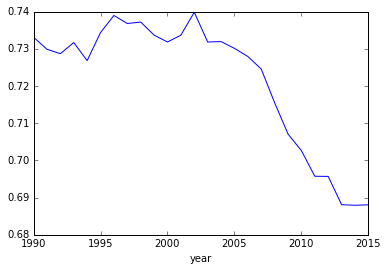

In [80]:
df_plot = pct_pivot(df, index=['year'], columns=['Living Independently'])
df_plot.head()
df_plot[1].plot()

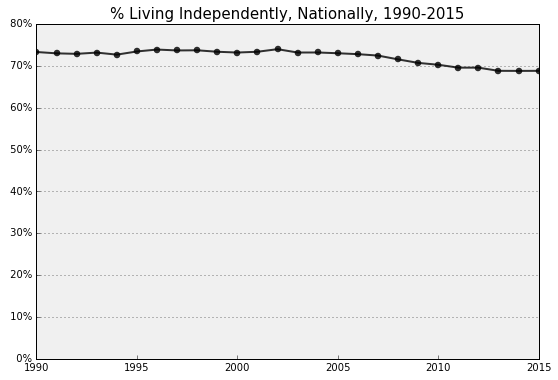

In [81]:
line_chart(df_plot[1], ylim=[0,0.8],
          title = '% Living Independently, Nationally, 1990-2015',
          filename='National.pdf')

## Important note: definitions changed in 1994 through part of 1995, when it changed again. Most comparable is 1995 onwards

In [ ]:
df2 = pd.read_stata(matches[0], convert_categoricals = False)

In [94]:
pct_pivot(df2)

Living Independently,0,1,All
In Sample,,,
0,0.143384,0.856616,1
1,0.323323,0.676677,1
All,0.186021,0.813979,1


In [98]:
pct_pivot(df2, index=['Millenial'])

Living Independently,0,1,All
Millenial,,,
0,0.118851,0.881149,1
1,0.369496,0.630504,1
All,0.186021,0.813979,1


In [51]:
df_2014 = df[df['year'] == 2014]

In [52]:
root = '/Users/Lee/Documents/jupyter/notebooks/CP207/Census_Data/'
#Get all of the cost reports
matches = []
for root, dirnames, filenames in os.walk(root):
  for filename in fnmatch.filter(filenames, '*_with_ann.csv'):
    matches.append(os.path.join(root, filename))

In [54]:
matches[-1]

'/Users/Lee/Documents/jupyter/notebooks/CP207/Census_Data/Median_Rent/ACS_14_1YR_B25064/ACS_14_1YR_B25064_with_ann.csv'

In [55]:
df_rent = pd.read_csv(matches[-1])
df_rent.rename(columns={'GEO.id2':'cbsafips', 'HD01_VD01':'Median_Rent', 'HD02_VD01':'Median_Rent_MOE'},inplace=True)
df_rent.drop('GEO.id', axis=1, inplace=True)
df_rent.head()

,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
0,10140,"Aberdeen, WA Micro Area",819,57
1,10180,"Abilene, TX Metro Area",814,44
2,10300,"Adrian, MI Micro Area",728,57
3,10420,"Akron, OH Metro Area",756,20
4,10460,"Alamogordo, NM Micro Area",845,142


In [102]:
t = df_2014.groupby('cbsafips').count()
t = t[t.year > 100]
df_plot = pct_pivot(df_2014, index=['cbsafips'], columns=['Living Independently'])
df_plot = t.merge(df_plot, left_index=True, right_index=True, how='left')
#df_plot = pct_pivot(df, index=['msafips'], columns=['Living Independently'])
df_plot.rename(columns={0:'Not_Independent', 1:'Independent'}, inplace=True)
df_plot = df_plot.merge(df_rent, how='left', right_on='cbsafips', left_index=True)

In [57]:
df_plot.head(3)

,In Sample,age,msafips,relaref,relref94,relref95,schlvl,studftpt,year,Living Independently,Not_Independent,Independent,All,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
507,18399,18399,0,0,0,18399,1903,1903,18399,18399,0.284689,0.715311,1,0,NaN,NaN,NaN
3,120,120,0,0,0,120,13,13,120,120,0.341667,0.658333,1,10420,"Akron, OH Metro Area",756,20
7,144,144,0,0,0,144,20,20,144,144,0.319444,0.680556,1,10580,"Albany-Schenectady-Troy, NY Metro Area",931,16


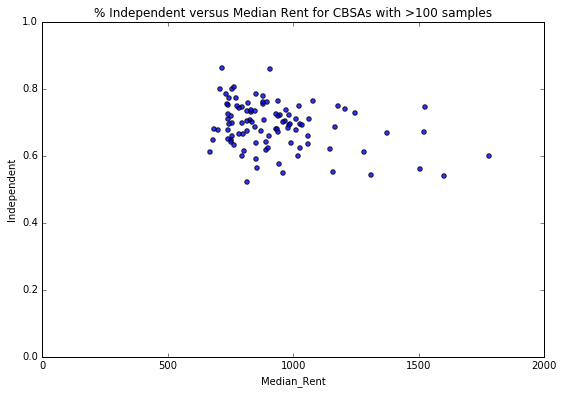

In [58]:
df_plot.plot(x='Median_Rent',
             y= 'Independent',
             title = '% Independent versus Median Rent for CBSAs with >100 samples',
             kind='scatter',
             ylim=[0,1],
             xlim=[0,2000],
            figsize=[9,6],
            alpha=0.8)

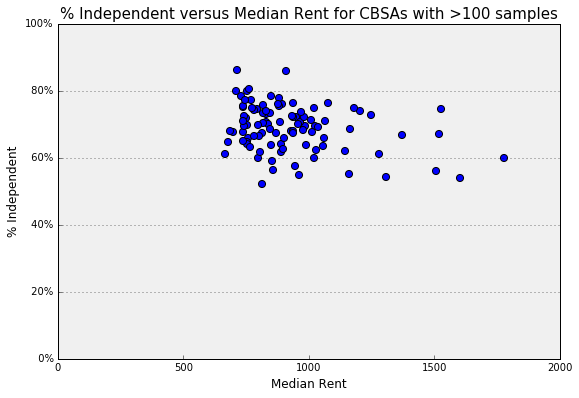

In [104]:
#df3.plot(kind='scatter', x='disadvantage_weighted', y='lane_miles_repaving')

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
rs_scatter = ax.scatter(x=df_plot['Median_Rent'], y=df_plot['Independent'],
                        #c=point_color, edgecolor=edge_color,
                        alpha=1, s=50,
                       )

ax.yaxis.grid(True)

ax.set_xlim([0,2000])
ax.set_ylim([0, 1])
# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    #bottom='off',      # ticks along the bottom edge are off
    top='off'         # ticks along the top edge are off
    )

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    )

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

# set title, axis labels, background color
ax.set_title('% Independent versus Median Rent for CBSAs with >100 samples', fontproperties=title_font)
ax.set_xlabel('Median Rent', fontproperties=label_font)
ax.set_ylabel('% Independent', fontproperties=label_font)
ax.set_axis_bgcolor(axis_bgcolor)
    
#plt.show()
plt.savefig('Median Rent Scatter.pdf', format='pdf')

In [60]:
len(df_plot)

110

In [77]:
df_plot.head()

Living Independently,0,1,All
msafips,,,
80,0.246341,0.753659,1
160,0.263533,0.736467,1
200,0.236257,0.763743,1
240,0.326656,0.673344,1
380,0.240901,0.759099,1


In [50]:
df_cbsa = pd.pivot_table(df_2015, values='age', index=['cbsafips'], columns=['Living Independently'],
               aggfunc=np.count_nonzero,
              margins=True)

In [53]:
len(df_cbsa)

297

In [55]:
len(df_cbsa[df_cbsa['All'] > 10])

292

In [87]:
df[df.cbsafips == 41860].groupby('year').count()

,msafips,cbsafips,age,studftpt,schlvl,relref95,Living Independently
year,,,,,,,
2004,0,419,419,29,29,419,419
2005,0,823,823,33,33,823,823
2006,0,798,798,43,43,798,798
2007,0,709,709,43,43,709,709
2008,0,816,816,42,42,816,816
2009,0,815,815,56,56,815,815
2010,0,843,843,49,49,843,843
2011,0,839,839,55,55,839,839
2012,0,857,857,59,59,857,857


In [105]:
df_2015.head()

,year,cbsafips,age,studftpt,schlvl,relref95,Living Independently
6,2015,13820,27,NaN,NaN,2,1
10,2015,33660,22,NaN,NaN,1,1
11,2015,33660,27,NaN,NaN,14,1
18,2015,33860,18,1,1,4,0
19,2015,33860,20,NaN,NaN,4,0


In [106]:
df_rent.head()

,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
0,10140,"Aberdeen, WA Micro Area",819,57
1,10180,"Abilene, TX Metro Area",814,44
2,10300,"Adrian, MI Micro Area",728,57
3,10420,"Akron, OH Metro Area",756,20
4,10460,"Alamogordo, NM Micro Area",845,142


In [62]:
df_cbsa = pct_pivot(df_2014, index=['cbsafips'], columns=['Living Independently'])
df_cbsa.drop('All', axis = 1, inplace = True)
df_cbsa.rename(columns={0:'Not_Independent', 1:'Independent'}, inplace=True)

In [63]:
df_cbsa.head()

Living Independently,Not_Independent,Independent
cbsafips,,
0,0.284689,0.715311
10180,0.500000,0.500000
10420,0.341667,0.658333
10500,0.354167,0.645833
10580,0.319444,0.680556


In [64]:
df_plot = df_cbsa.merge(df_rent, how='left', right_on='cbsafips', left_index=True)

In [141]:
df_plot.head()

Living Independently,Not_Independent,Independent,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
507,0.297407,0.702593,0,NaN,NaN,NaN
1,0.500000,0.500000,10180,"Abilene, TX Metro Area",814,44
3,0.341667,0.658333,10420,"Akron, OH Metro Area",756,20
5,0.354167,0.645833,10500,"Albany, GA Metro Area",712,22
7,0.340278,0.659722,10580,"Albany-Schenectady-Troy, NY Metro Area",931,16


In [142]:
df_plot = df_plot[~pd.isnull(df_plot['Median_Rent'])]

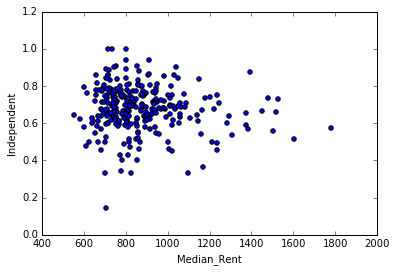

In [143]:
df_plot.plot(x='Median_Rent', y= 'Independent', kind='scatter')

In [144]:
df_plot[df_plot.Independent < 0.2]

Living Independently,Not_Independent,Independent,cbsafips,GEO.display-label,Median_Rent,Median_Rent_MOE
168,0.857143,0.142857,24140,"Goldsboro, NC Metro Area",703,36


In [66]:
df_cbsa = df[df.cbsafips == 38900]

In [195]:
df[df.cbsafips == 38900].groupby('year').count()

,msafips,cbsafips,age,studftpt,schlvl,relref95,Living Independently
year,,,,,,,
2004,0,468,468,21,21,468,468
2005,0,652,652,28,28,652,652
2006,0,580,580,34,34,580,580
2007,0,626,626,37,37,626,626
2008,0,605,605,20,20,605,605
2009,0,631,631,22,22,631,631
2010,0,611,611,39,39,611,611
2011,0,598,598,28,28,598,598
2012,0,580,580,32,32,580,580


In [67]:
df_plot = pct_pivot(df_cbsa, index=['year'], columns=['Living Independently'])

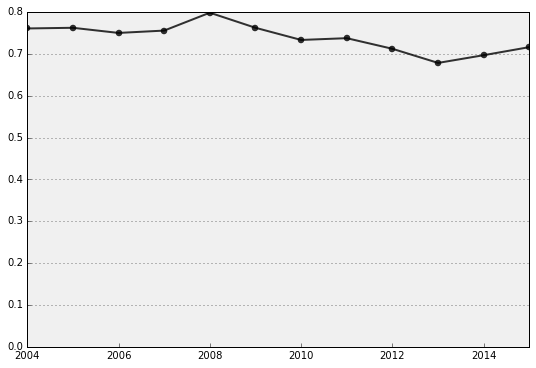

In [197]:
line_chart(df_plot[1], ylim=[0,0.8])

In [94]:
df_plot = pct_pivot(df, index=['cbsafips', 'year'], columns=['Living Independently'])
df_plot = df_plot.unstack(level=0)[1][[41860,35620, 18140, 38900]].rename(columns={41860:'SF/Oakland',
                                                                        35620:'NYC',
                                                                        18140:'Columbus, OH',
                                                                        38900:'Portland, OR'})

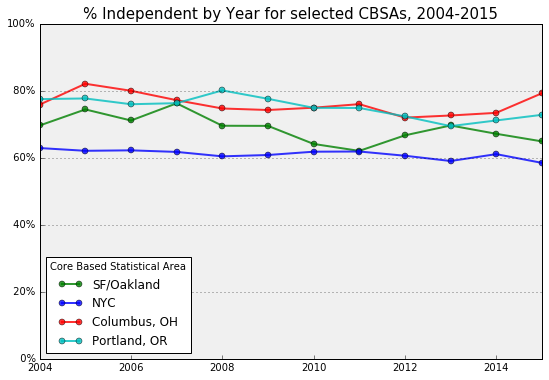

In [96]:
line_chart(df_plot, #SF/Oakland, NYC, Columbus, Portland
           ylim=[0,1],
           color='gbrc',
          title='% Independent by Year for selected CBSAs, 2004-2015',
          filename = 'Selected CBSAs.pdf',
          legend_title = 'Core Based Statistical Area',
          legend_loc = 'lower left')

In [116]:
df.columns

Index([u'year', u'msafips', u'cbsafips', u'age', u'studftpt', u'schlvl',
       u'relref95', u'Living Independently'],
      dtype='object')

In [71]:
def pct_pivot(data, index=['In Sample'], columns=['Living Independently']):
    table = pd.pivot_table(data, values='studftpt', index=index, columns=columns,
               aggfunc=np.count_nonzero,
              margins=True)
    table.drop('All', inplace=True)
    return table.div( table.iloc[:,-1], axis=0 )

In [98]:
df_plot = pct_pivot(df, index=['year', 'age'], columns=['Living Independently'])

In [99]:
df_plot.head()

Living Independently         0         1  All
year age                                     
1990 18               0.870245  0.129755    1
     19               0.746402  0.253598    1
     20               0.625926  0.374074    1
     21               0.531404  0.468596    1
     22               0.451659  0.548341    1

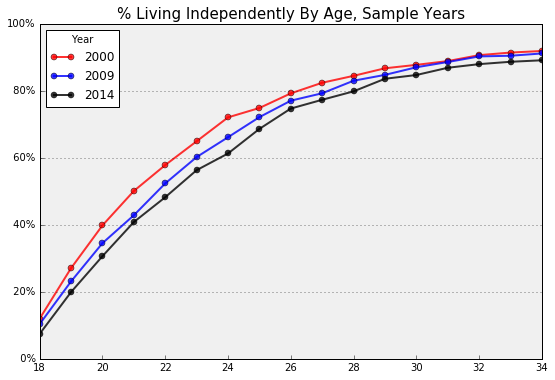

In [100]:
line_chart(df_plot.unstack(level=0)[1][[2000,2009,2014]],
           ylim=[0,1], color='rbk',
           title='% Living Independently By Age, Sample Years',
          filename='Age Distributions.pdf',
          legend_title = 'Year',
          legend_loc = 'upper left')

Next steps:
- discrete choice models?
- Regresions on other variables?
- trends for specific CBSA's over time?

To have for Tuesday:
- National graph
- Trends - Bay Area Graph, NY, Columbus, Portland (Selected)
- Scatter plots (2014) - Median Rent
- Line graph of age, 2014 (if possible, over time)

For presentation: what are potential next steps?
- Weak trends overall
- Will consider a discrete choice model of choice factors

Sample code from http://statsmodels.sourceforge.net/stable/examples/notebooks/generated/discrete_choice_example.html

In [5]:
columns_to_keep_model = ['year',
                         'cbsafips',
                         'age',
                         'studftpt',
                         'schlvl',
                         'relref95',
                        'earnwke',
                        'grade92',
                        'ownchild',
                        'marital',
                        'ethnic',
                        'race',
                        'sex',
                        'Median_Rent']

ownchild - number from 0-8

earnwke - number in dollars

grade92:
    - range(31,39) : didn't complete HS
    - 39: completed HS
    - 40: some college, no degree
    - 41: associate's degree, vocational
    - 42: associate's degree, educational
    - 43: Bachelor's
    - 44: masters
    - 45: professional degree
    - 46: doctorate
    
Marital status:
    - 1: Married civilian, spouse present
    - 2: armed forces, spouse present
    - 3: married, spouse absent or separated
    - 4: widowed
    - 5: divorced
    - 6: separated
    - 7: never married
    
prdtrace:
    - 1: white
    - 2: black
    - 3: American indian
    - 4: Asian only
    - 5: Hawaiian/Pacific Islander only
    - all other will be grouped

ethnic:
    - 8: non-hispanic
    - 9: don't know
    - 1-5: hispanic
    
sex:
    - 1: Male
    - 2: Female

In [53]:
df_rent = pd.read_csv('/Users/Lee/Documents/jupyter/notebooks/CP207/Census_Data/Median_Rent/ACS_14_1YR_B25064/ACS_14_1YR_B25064_with_ann.csv')
df_rent.rename(columns={'GEO.id2':'cbsafips', 'HD01_VD01':'Median_Rent', 'HD02_VD01':'Median_Rent_MOE'},inplace=True)
df_rent.set_index('cbsafips', drop=True, inplace=True)
df_rent.drop('GEO.id', axis=1, inplace=True)
df_rent.head(2)

,GEO.display-label,Median_Rent,Median_Rent_MOE
cbsafips,,,
10140,"Aberdeen, WA Micro Area",819,57
10180,"Abilene, TX Metro Area",814,44


In [55]:
df = process_CPS_file('/Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg14.dta', limit_columns=False)

Processing /Users/Lee/Documents/jupyter/notebooks/CP207/CPS Data/morg14.dta


In [56]:
df = df.merge(df_rent, how='left', left_on='cbsafips', right_index=True)
df = df[columns_to_keep_model]
df.head()

,year,cbsafips,age,studftpt,schlvl,relref95,earnwke,grade92,ownchild,marital,ethnic,race,sex,Median_Rent
2,2014,26620,29,NaN,NaN,4,1692,43,0,7,NaN,1,2,718
4,2014,33860,27,NaN,NaN,1,450,41,2,1,NaN,2,2,817
5,2014,33860,30,NaN,NaN,3,1090,41,2,1,NaN,2,1,817
12,2014,33660,29,NaN,NaN,2,880,39,0,7,NaN,1,1,822
13,2014,33660,25,NaN,NaN,14,360,39,0,7,NaN,1,2,822


In [57]:
len(df[df['earnwke'] == 0][columns_to_keep_model])

77

In [58]:
df[columns_to_keep_model].head()

,year,cbsafips,age,studftpt,schlvl,relref95,earnwke,grade92,ownchild,marital,ethnic,race,sex,Median_Rent
2,2014,26620,29,NaN,NaN,4,1692,43,0,7,NaN,1,2,718
4,2014,33860,27,NaN,NaN,1,450,41,2,1,NaN,2,2,817
5,2014,33860,30,NaN,NaN,3,1090,41,2,1,NaN,2,1,817
12,2014,33660,29,NaN,NaN,2,880,39,0,7,NaN,1,1,822
13,2014,33660,25,NaN,NaN,14,360,39,0,7,NaN,1,2,822


In [59]:
#Fill missing earnings with 0
df['earnwke'].fillna(0, inplace=True)

In [60]:
len(df[pd.isnull(df['earnwke'])][columns_to_keep_model])

0

In [61]:
df['gender_m'] = (df['sex'] == 1).apply(lambda x: 1 if x else 0)

In [62]:
df['has_children'] = (df['ownchild'] > 0).apply(lambda x: 1 if x else 0)

Marital status:
    - 1: Married civilian, spouse present
    - 2: armed forces, spouse present
    - 3: married, spouse absent or separated
    - 4: widowed
    - 5: divorced
    - 6: separated
    - 7: never married

In [63]:
df['never_married'] = (df['marital'] == 7).apply(lambda x: 1 if x else 0)

prdtrace:
    - 1: white
    - 2: black
    - 3: American indian
    - 4: Asian only
    - 5: Hawaiian/Pacific Islander only
    - all other will be grouped

In [64]:
df['is_black'] = (df.race == 2).apply(lambda x: 1 if x else 0)
df['is_asian'] = (df.race == 4).apply(lambda x: 1 if x else 0)
df['is_am_indian'] = (df.race == 3).apply(lambda x: 1 if x else 0)
df['is_hispanic'] = (df.ethnic != 8).apply(lambda x: 1 if x else 0)

grade92:
    - range(31,39) : didn't complete HS
    - 39: completed HS
    - 40: some college, no degree
    - 41: associate's degree, vocational
    - 42: associate's degree, educational
    - 43: Bachelor's
    - 44: masters
    - 45: professional degree
    - 46: doctorate

In [65]:
df['ed_below_hs'] = (df['grade92'].isin(range(31,39))).apply(lambda x: 1 if x else 0)
df['ed_completed_hs'] = (df['grade92'].isin([39])).apply(lambda x: 1 if x else 0)
df['ed_no_completed_higher'] = (df['grade92'].isin([40])).apply(lambda x: 1 if x else 0)
df['ed_associates_deg'] = (df['grade92'].isin([41,42])).apply(lambda x: 1 if x else 0)
#df['ed_bachelors'] = (data['grade92'].isin([44,45,46])).apply(lambda x: 1 if x else 0)
df['ed_masters_and_above'] = (df['grade92'].isin([44,45,46])).apply(lambda x: 1 if x else 0)

In [66]:
print (df.ed_below_hs.value_counts())
print (df.ed_completed_hs.value_counts())
print (df.ed_no_completed_higher.value_counts())
print (df.ed_associates_deg.value_counts())
print (df.ed_masters_and_above.value_counts())

0    65701
1     9425
Name: ed_below_hs, dtype: int64
0    53165
1    21961
Name: ed_completed_hs, dtype: int64
0    59859
1    15267
Name: ed_no_completed_higher, dtype: int64
0    68248
1     6878
Name: ed_associates_deg, dtype: int64
0    69321
1     5805
Name: ed_masters_and_above, dtype: int64


In [67]:
len(df)

75126

In [68]:
(df['grade92'].isin([43])).apply(lambda x: 1 if x else 0).value_counts()

0    59336
1    15790
Name: grade92, dtype: int64

In [69]:
def independently(data):
    return (data['relref95'].isin([1, 2, 3, 12, 13, 14, 15, 16, 17 , 18])).apply(lambda x: 1 if x else 0)

In [70]:
df['Living_Independently'] = independently(df)

In [71]:
df = df[df.age.notnull()]

In [83]:
df.earnwke.describe()

count    75126.000000
mean       481.484443
std        533.801565
min          0.000000
25%          0.000000
50%        380.000000
75%        720.000000
max       2884.610000
Name: earnwke, dtype: float64

In [84]:
df['earnwke_100s'] = df['earnwke']/100
df['Median_Rent_100s'] = df['Median_Rent']/100

In [130]:
df['earnwke_transformed'] = df['earnwke']
df['earnwke_transformed'] = df['earnwke_transformed'].apply(lambda x: 1 if x < 1 else x)

In [132]:
df['earnwke_ln'] = np.log(df['earnwke_transformed'])
df['Median_Rent_ln'] = np.log(df['Median_Rent'])

In [127]:
df[df['zero_earnings'] == 1][['earnwke', 'zero_earnings', 'marital', 'Living_Independently']]

,earnwke,zero_earnings,marital,Living_Independently
17,0,1,6,1
27,0,1,7,0
47,0,1,7,0
51,0,1,7,1
64,0,1,2,1
96,0,1,1,1
97,0,1,1,1
142,0,1,5,1
177,0,1,1,0
195,0,1,7,1


In [116]:
df.earnwke_ln.replace(-np.inf, np.nan, inplace=True)

In [117]:
df.earnwke_ln.replace(np.nan, 0, inplace=True)

In [118]:
df.earnwke_ln.describe()

count    75126.000000
mean         4.317316
std          2.997646
min         -4.605170
25%          0.000000
50%          5.940171
75%          6.579251
max          7.967145
Name: earnwke_ln, dtype: float64

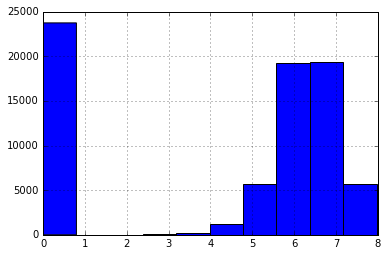

In [136]:
df[df.earnwke_ln.notnull()].earnwke_ln.hist()

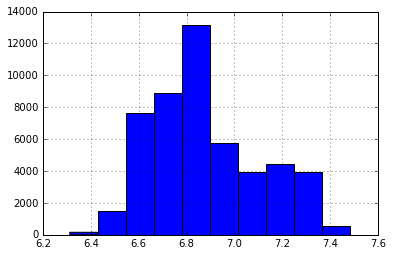

In [135]:
df.Median_Rent_ln.hist()

In [133]:
from __future__ import print_function
import numpy as np
from scipy import stats
#import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit

independent_mod = logit("Living_Independently ~ gender_m + never_married + earnwke_ln + has_children + is_hispanic + is_black + is_asian + ed_below_hs + ed_completed_hs + ed_no_completed_higher + ed_associates_deg + ed_masters_and_above + Median_Rent_ln", df[df.Median_Rent.notnull()]).fit()

print(independent_mod.summary())

Optimization terminated successfully.
         Current function value: 0.461334
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Living_Independently   No. Observations:                49925
Model:                            Logit   Df Residuals:                    49911
Method:                             MLE   Df Model:                           13
Date:                  Sun, 01 May 2016   Pseudo R-squ.:                  0.2570
Time:                          14:46:57   Log-Likelihood:                -23032.
converged:                         True   LL-Null:                       -30997.
                                          LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  5.0668      0.380     13.334      0.000  

In [134]:
from __future__ import print_function
import numpy as np
from scipy import stats
#import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit

independent_mod = logit("Living_Independently ~ gender_m + never_married + earnwke_ln + has_children + is_hispanic + is_black + is_asian + ed_below_hs + ed_completed_hs + ed_no_completed_higher + ed_associates_deg + ed_masters_and_above", df[~df.Median_Rent.notnull()]).fit()

print(independent_mod.summary())

Optimization terminated successfully.
         Current function value: 0.463653
         Iterations 7
                            Logit Regression Results                            
Dep. Variable:     Living_Independently   No. Observations:                25201
Model:                            Logit   Df Residuals:                    25188
Method:                             MLE   Df Model:                           12
Date:                  Sun, 01 May 2016   Pseudo R-squ.:                  0.2528
Time:                          14:47:53   Log-Likelihood:                -11685.
converged:                         True   LL-Null:                       -15637.
                                          LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.5614      0.188      8.294      0.000  